In [4]:
from langchain_community.document_loaders import DirectoryLoader

path = "../Sample_Docs_Markdown/"
loader = DirectoryLoader(path, glob="**/*.md")
docs = loader.load()

libmagic is unavailable but assists in filetype detection. Please consider installing libmagic for better results.
libmagic is unavailable but assists in filetype detection. Please consider installing libmagic for better results.
libmagic is unavailable but assists in filetype detection. Please consider installing libmagic for better results.
libmagic is unavailable but assists in filetype detection. Please consider installing libmagic for better results.
libmagic is unavailable but assists in filetype detection. Please consider installing libmagic for better results.
libmagic is unavailable but assists in filetype detection. Please consider installing libmagic for better results.
libmagic is unavailable but assists in filetype detection. Please consider installing libmagic for better results.
libmagic is unavailable but assists in filetype detection. Please consider installing libmagic for better results.
libmagic is unavailable but assists in filetype detection. Please consider insta

In [5]:
docs[0]

Document(metadata={'source': '..\\Sample_Docs_Markdown\\advisory-group-members.md'}, page_content='layout: default title: Advisory Group Members description: "This page lists the members of the Diversity, Inclusion & Belonging Advisory Group."\n\n{{< group-by-expertise "Diversity, Inclusion & Belonging Advisory Group" >}}')

In [6]:
from ragas.llms import LangchainLLMWrapper
from ragas.embeddings import LangchainEmbeddingsWrapper
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAIEmbeddings

generator_llm = LangchainLLMWrapper(ChatOpenAI(model="gpt-3.5-turbo"))
generator_embeddings = LangchainEmbeddingsWrapper(OpenAIEmbeddings())

In [11]:
from ragas.testset import TestsetGenerator

generator = TestsetGenerator(llm=generator_llm, embedding_model=generator_embeddings)

In [5]:
dataset = generator.generate_with_langchain_docs(docs, testset_size=10)

Applying HeadlineSplitter:   0%|          | 0/12 [00:00<?, ?it/s]         unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
Generating Samples: 100%|██████████| 12/12 [00:03<00:00,  3.95it/s]


In [6]:
dataset.to_pandas()

,user_input,reference_contexts,reference,synthesizer_name
0,Wht is The Ally Lab?,"[title: ""The Ally Lab"" description: Learn what...",The Ally Lab is a resource that teaches what i...,single_hop_specifc_query_synthesizer
1,How can Zoom be utilized effectively to foster...,[Skills and Behaviors of allies To be an effec...,Zoom can be utilized effectively to foster inc...,single_hop_specifc_query_synthesizer
2,How does diversity show up on teams and what a...,[Tips on being an ally Identifying your power ...,Diversity shows up on teams in various areas s...,single_hop_specifc_query_synthesizer
3,How does performative allyship differ from gen...,[What it means to be an ally Take on the strug...,Performative allyship refers to actions taken ...,single_hop_specifc_query_synthesizer
4,"How does the Diversity, Inclusion & Belonging ...",[<1-hop>\n\ntitle: Diversity Inclusion & Belon...,"The Diversity, Inclusion & Belonging (DIB) Tea...",multi_hop_abstract_query_synthesizer
5,How does active listening contribute to the ef...,[<1-hop>\n\ntitle: Diversity Inclusion & Belon...,Active listening is crucial for the effectiven...,multi_hop_abstract_query_synthesizer
6,"How does the Diversity, Inclusion & Belonging ...",[<1-hop>\n\ntitle: Diversity Inclusion & Belon...,"The Diversity, Inclusion & Belonging (DIB) Tea...",multi_hop_abstract_query_synthesizer
7,How does the Sales Sponsorship Pilot Program a...,"[<1-hop>\n\ntitle: ""Sales Sponsorship Pilot Pr...",The Sales Sponsorship Pilot Program aims to im...,multi_hop_abstract_query_synthesizer
8,What strategies can be implemented to enhance ...,"[<1-hop>\n\nCreating a Diversity, Inclusion & ...","To enhance the effectiveness of the Diversity,...",multi_hop_specific_query_synthesizer
9,"How can the creation of a Diversity, Inclusion...","[<1-hop>\n\nCreating a Diversity, Inclusion & ...","The creation of a Diversity, Inclusion & Belon...",multi_hop_specific_query_synthesizer


In [15]:
# Convert testset to RAGAS format
import pandas as pd
from datasets import Dataset

# Convert to pandas
df = dataset.to_pandas()

# Create the proper format for RAGAS evaluation
ragas_data = []
for _, row in df.iterrows():
    # Convert reference_contexts to a list of strings
    contexts = row["reference_contexts"]
    if isinstance(contexts, str):
        # Split by some delimiter or use the whole string
        context_list = [contexts]
    elif isinstance(contexts, list):
        context_list = contexts
    else:
        context_list = [str(contexts)]
    
    ragas_sample = {
        "question": row["user_input"],
        "answer": row["reference"],  # Using reference as the generated answer
        "contexts": context_list,  # List of context strings
        "ground_truth": row["reference"]  # Using reference as ground truth
    }
    ragas_data.append(ragas_sample)

# Create RAGAS dataset
ragas_dataset = Dataset.from_list(ragas_data)

In [16]:
ragas_dataset[0]

{'question': 'Wht is The Ally Lab?',
 'answer': 'The Ally Lab is a resource that teaches what it means to be an ally, how to be an ally, and the actions involved in supporting marginalized groups. It emphasizes that being an ally is a proactive action aimed at removing barriers for others in the workplace or community.',
 'contexts': ['title: "The Ally Lab" description: Learn what is an ally, how to be an ally and what it means to be an ally. What is an ally? A diversity, inclusion and belonging "ally" is someone who is willing to take action in support of another person, in order to remove barriers that impede that person from contributing their skills and talents in the workplace or community. Being an ally is a verb, this means that you proactively and purposefully take action and is not something forced upon you. How to be an ally It is not required to be an ally to work at GitLab. At GitLab it is required to be inclusive. Being an ally goes a step beyond being inclusive to taking 

In [17]:
from ragas import evaluate
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    context_precision,
    context_recall,
)

results = evaluate(
    dataset=ragas_dataset,  # Use the converted dataset
    metrics=[faithfulness, answer_relevancy, context_precision, context_recall]
)
results.to_pandas()

Evaluating: 100%|██████████| 48/48 [00:27<00:00,  1.74it/s]


,user_input,retrieved_contexts,response,reference,faithfulness,answer_relevancy,context_precision,context_recall
0,Wht is The Ally Lab?,"[title: ""The Ally Lab"" description: Learn what...",The Ally Lab is a resource that teaches what i...,The Ally Lab is a resource that teaches what i...,1.000000,0.948885,1.0,1.0
1,How can Zoom be utilized effectively to foster...,[Skills and Behaviors of allies To be an effec...,Zoom can be utilized effectively to foster inc...,Zoom can be utilized effectively to foster inc...,0.777778,0.986597,1.0,1.0
2,How does diversity show up on teams and what a...,[Tips on being an ally Identifying your power ...,Diversity shows up on teams in various areas s...,Diversity shows up on teams in various areas s...,1.000000,0.942235,1.0,1.0
3,How does performative allyship differ from gen...,[What it means to be an ally Take on the strug...,Performative allyship refers to actions taken ...,Performative allyship refers to actions taken ...,1.000000,0.973961,1.0,1.0
4,"How does the Diversity, Inclusion & Belonging ...",[<1-hop>\n\ntitle: Diversity Inclusion & Belon...,"The Diversity, Inclusion & Belonging (DIB) Tea...","The Diversity, Inclusion & Belonging (DIB) Tea...",1.000000,0.962752,1.0,1.0
5,How does active listening contribute to the ef...,[<1-hop>\n\ntitle: Diversity Inclusion & Belon...,Active listening is crucial for the effectiven...,Active listening is crucial for the effectiven...,0.666667,0.929453,1.0,1.0
6,"How does the Diversity, Inclusion & Belonging ...",[<1-hop>\n\ntitle: Diversity Inclusion & Belon...,"The Diversity, Inclusion & Belonging (DIB) Tea...","The Diversity, Inclusion & Belonging (DIB) Tea...",0.916667,0.996426,1.0,1.0
7,How does the Sales Sponsorship Pilot Program a...,"[<1-hop>\n\ntitle: ""Sales Sponsorship Pilot Pr...",The Sales Sponsorship Pilot Program aims to im...,The Sales Sponsorship Pilot Program aims to im...,1.000000,0.900147,1.0,1.0
8,What strategies can be implemented to enhance ...,"[<1-hop>\n\nCreating a Diversity, Inclusion & ...","To enhance the effectiveness of the Diversity,...","To enhance the effectiveness of the Diversity,...",1.000000,0.927539,1.0,1.0
9,"How can the creation of a Diversity, Inclusion...","[<1-hop>\n\nCreating a Diversity, Inclusion & ...","The creation of a Diversity, Inclusion & Belon...","The creation of a Diversity, Inclusion & Belon...",0.636364,0.982820,1.0,1.0


C:\Users\ACER\AppData\Local\Temp\ipykernel_16912\493238343.py:5: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


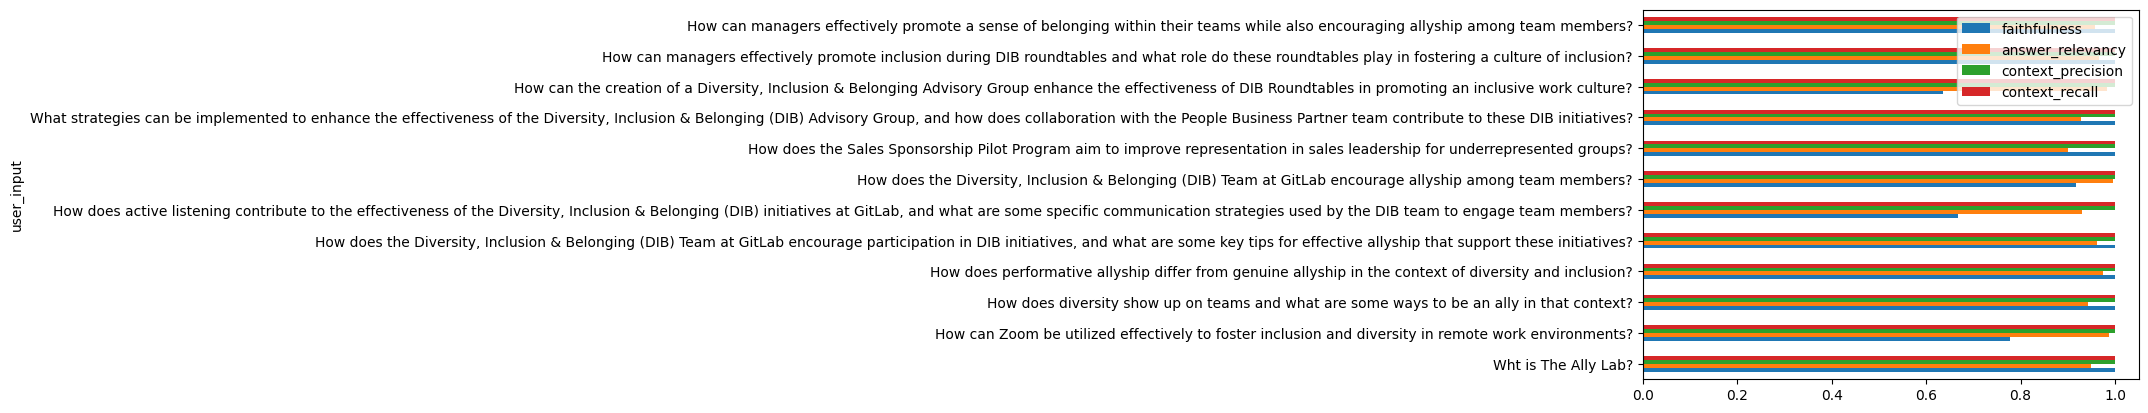

In [18]:
import matplotlib.pyplot as plt

df = results.to_pandas()
df.plot.barh(x='user_input', y=['faithfulness', 'answer_relevancy', 'context_precision', 'context_recall'])
plt.tight_layout()
plt.show()


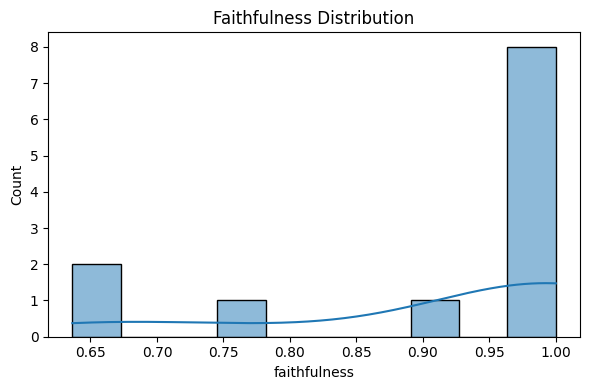

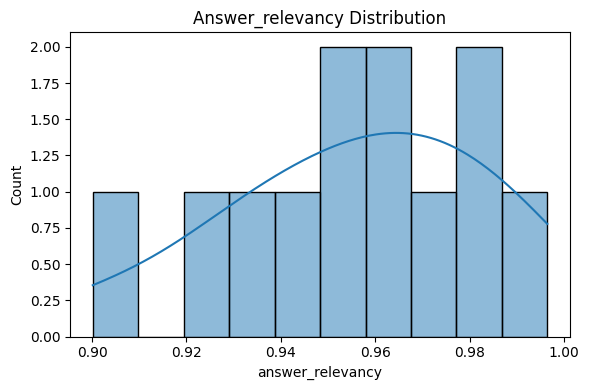

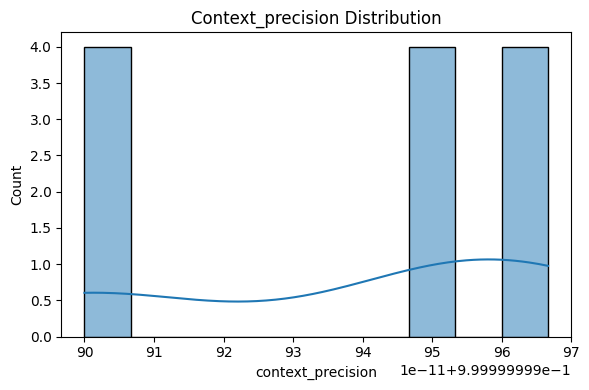

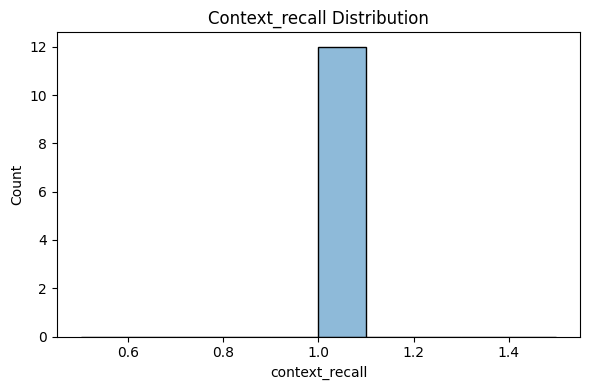

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['faithfulness', 'answer_relevancy', 'context_precision', 'context_recall']
for metric in metrics:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[metric], kde=True, bins=10)
    plt.title(f"{metric.capitalize()} Distribution")
    plt.xlabel(metric)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


In [ ]:
low_scores = df[df["faithfulness"] < 0.5]
low_scores[["user_input", "faithfulness"]].plot.barh(
    x="user_input", y="faithfulness", legend=False, figsize=(10, 5)
)
plt.title("Low Faithfulness QnAs")
plt.xlabel("Faithfulness")
plt.tight_layout()
plt.show()


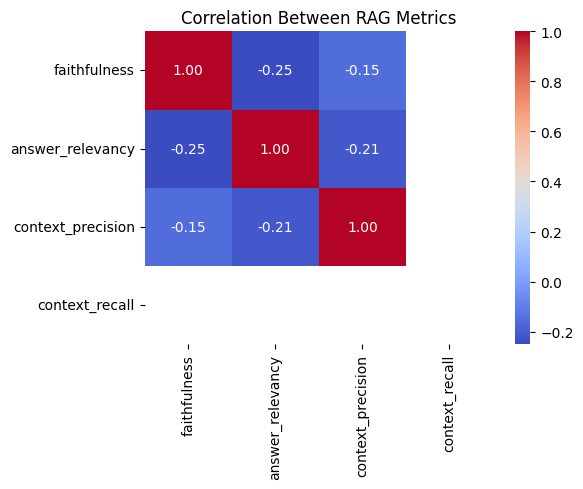

In [22]:
plt.figure(figsize=(6, 5))
sns.heatmap(df[metrics].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between RAG Metrics")
plt.tight_layout()
plt.show()
